<a href="https://colab.research.google.com/github/DivinitasMaxima/BINA-REPO/blob/main/4_Daten_analysieren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color: black; text-align: left;"><b>4. Daten analysieren</b></h1>
<p style="font-size: 16px; line-height: 1.5;">
Im Zentrum der Datenanalyse stehen "Descriptive", "Diagnostic" und "Predictive Analytics" im Vordergrund. Die beschreibende Analyse bezieht sich hauptsächlich die Analyse historischer Daten, um vergangene Ereignisse zu verstehen. Ziel ist es Muster und Trends in den Daten zu identifizieren. Übliche Methoden sind Mittelwerte, Standardabweichungen, minimale und maximale Werte, Korrelationen und Kreuztabellen. Für die Visualisierung werden Dashboards und Diagramme oder sogenannte Heatmaps erstellt. Mit "Diagnostic Analytics" wird einen Schritt weiter gegangen und versucht die Ursachen für bestimmte Ereignisse oder Trends zu identifizieren. Hierbei werden zusätzliche Techniken wie sogenannte "Drill-Down-Analysen", Korrelationen und Hypothesentests durchgeführt. "Predictive Analytics" nutzt historische Daten und statistische Modelle, um zukünftige Ereignisse vorherzusagen. Dabei werden Instrumente wie maschinelles Lernen, Regressionsmodelle und Zeitreihenanalysen durchgeführt (Rashedi, 2024).
</p>
<h2 style="color: black; text-align: left;"><b>4.1. Analysen und Erkenntnisse zum primären Datensatz</b></h2>

<b>Frage: Wie verteilt sich die Passagierzahl auf verschiedene Altersgruppen?</b>

<p style="font-size: 16px; line-height: 1.5;">
Zur besseren Einordnung der Passagierstruktur wurde die Altersverteilung analysiert. Dafür wurden die Altersangaben der Befragten in drei Gruppen eingeteilt: „Jünger (≤30)“, „Mittel (31–60)“ und „Älter (>60)“. Die Analyse zeigt, dass die Mehrheit der Passagiere in die mittlere Altersgruppe (31–60 Jahre) fällt. Diese Gruppe macht 78'716 der befragten Personen aus. 40'754 der Passagiere sind 30 Jahre oder jünger, während etwa 10'017 über 60 Jahre alt sind.

Diese Verteilung verdeutlicht, dass ein grosser Teil der Fluggäste zur beruflich aktiven Bevölkerung zählt. Die Altersstruktur kann Rückschlüsse auf Erwartungen und Prioritäten beim Fliegen geben. In den Folgeanalysen wird daher auch betrachtet, ob und wie sich die Zufriedenheit je Altersgruppe unterscheidet.</p>


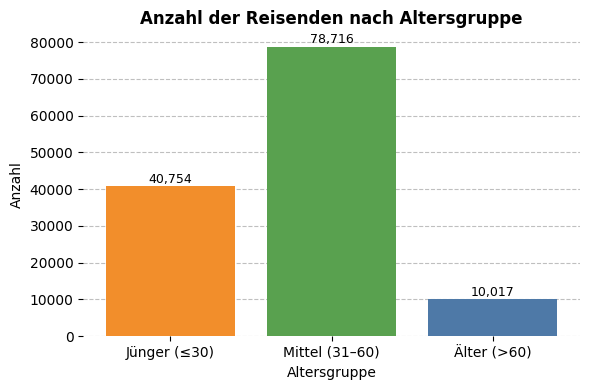

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden (falls noch nicht geschehen)
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Altersgruppen definieren
def alter_gruppe(alter):
    if alter <= 30:
        return 'Jünger (≤30)'
    elif 31 <= alter <= 60:
        return 'Mittel (31–60)'
    else:
        return 'Älter (>60)'

df_zufriedenheit['Altersgruppe'] = df_zufriedenheit['Age'].apply(alter_gruppe)
gruppen_order = ['Jünger (≤30)', 'Mittel (31–60)', 'Älter (>60)']
counts = df_zufriedenheit['Altersgruppe'].value_counts().reindex(gruppen_order)
labels = counts.index
values = counts.values
colors = ['#F28E2B', '#59A14F', '#4E79A7']

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=colors)
ax.set_title('Anzahl der Reisenden nach Altersgruppe', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl')
ax.set_xlabel('Altersgruppe')
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, f'{int(val):,}',
            ha='center', va='bottom', fontsize=9)

# IBCS-Layout
plt.tight_layout()
plt.box(False)
plt.show()


<b>Frage: Wie verteilt sich die Anzahl der Passagiere nach Geschlecht?</b>

<p style="font-size: 16px; line-height: 1.5;">
Zur Analyse der Passagierstruktur wurde die Verteilung nach Geschlecht ausgewertet. Dabei zeigt sich eine relativ ausgeglichene Verteilung. Etwa 50.7% der befragten Passagiere sind weiblich, während 49.3% männlich sind. In absoluten Zahlen sind dies 63'784 Männern und 65'703 Frauen bei den insgesamt rund 129'487 erfassten Passagieren.</p>

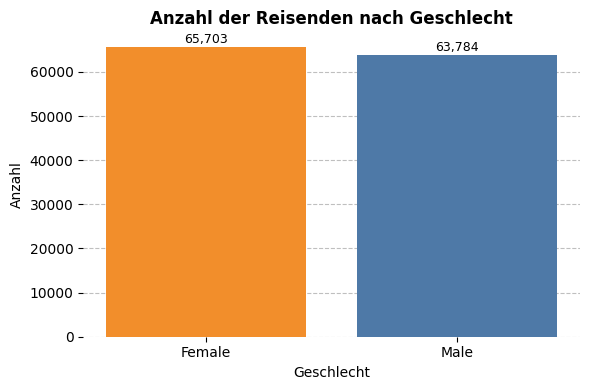

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden (falls noch nicht erfolgt)
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Anzahl pro Geschlecht zählen
counts = df_zufriedenheit['Gender'].value_counts().sort_index()
labels = counts.index
values = counts.values


colors = ['#F28E2B', '#4E79A7']  # z. B. Female, Male

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=colors)
ax.set_title('Anzahl der Reisenden nach Geschlecht', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl')
ax.set_xlabel('Geschlecht')
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, f'{val:,}',
            ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.box(False)
plt.show()

<b>Frage: Wie verteilen sich die Passagiere auf die Buchungsklassen?</b>

<p style="font-size: 16px; line-height: 1.5;">
Zur Einordnung des Serviceerlebnisses wurde analysiert, wie sich die Passagiere auf die unterschiedlichen Buchungsklassen verteilen. Der Grossteil der Passagiere buchte dabei ein Business- oder Economy-Ticket. Die Economy Plus ist deutlich geringer vertreten. In absoluten Zahlen sind dies 58'117 Passagiere in der Economy, 9'380 Passagiere in der Economy Plus und 61'990 Passagiere in der Business. Unterschiede in der Servicebewertung zwischen den Klassen werden in den Folgeanalysen genauer betrachtet.</p>

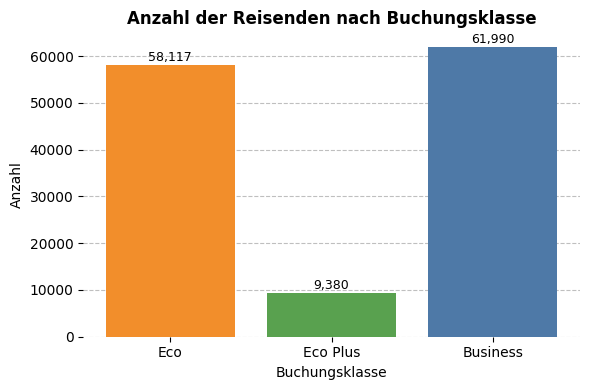

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden (falls noch nicht gemacht)
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)


class_order = ['Eco', 'Eco Plus', 'Business']
counts = df_zufriedenheit['Class'].value_counts()
counts = counts.reindex(class_order)  # Reihenfolge festlegen

labels = counts.index
values = counts.values

colors = ['#F28E2B', '#59A14F', '#4E79A7']
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=colors)
ax.set_title('Anzahl der Reisenden nach Buchungsklasse', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl')
ax.set_xlabel('Buchungsklasse')
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, f'{int(val):,}',
            ha='center', va='bottom', fontsize=9)

# IBCS: klares Layout
plt.tight_layout()
plt.box(False)
plt.show()

<b>Frage: Wie verteilen sich die Reisenden nach Segment?</b>

<p style="font-size: 16px; line-height: 1.5;">
Um ein besseres Verständnis über die Zusammensetzung der Passagiere zu erhalten, wurde die Verteilung der Reisetypen im Datensatz ausgewertet. Dabei zeigt sich, dass 89445 Reisende Geschäftlich unterwegs sind und 40042 privat fliegen, basierend auf den insgesamt 129487 gesammelten Passagierangaben. In Prozentzahlen entpsricht dies rund 69% Geschäftsreisende und 31% Urlaubsreisende.</p>

<p style="font-size: 16px; line-height: 1.5;">
Dies hat Implikationen für die Bewertung von Servicefaktoren, da Geschäftsreisende häufig andere Erwartungen und Prioritäten haben als private Fluggäste. In den folgenden Analysen wird daher unter anderem untersucht, wie sich die Zufriedenheit zwischen beiden Gruppen unterscheidet.</p>

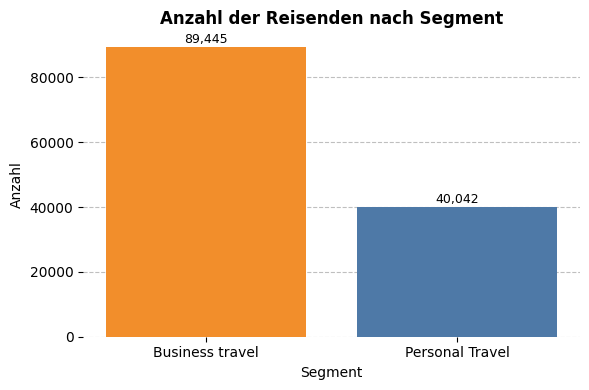

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Absolute Anzahl der Reisetypen zählen
counts = df_zufriedenheit['Type of Travel'].value_counts().sort_index()
labels = counts.index
values = counts.values

colors = ['#F28E2B', '#4E79A7']  # z. B. Business, Personal
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=colors)
ax.set_title('Anzahl der Reisenden nach Segment', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl')
ax.set_xlabel('Segment')
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, f'{val:,}',  # Mit Tausendertrennzeichen
            ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.box(False)
plt.show()


<b>Frage: Wie ist die allgemeine Verteilung der Zufriedenheit?</b>

<p style="font-size: 16px; line-height: 1.5;">
Um ein erstes verständis über die allgemeine Zufriedenheit der Passagiere zu erlangen wurde die Verteilung der Bewertungen ausgewertet. Die Analyse hat dabei ergeben, dass rund 45% der befragten Passagiere unzufrieden mit ihren Erfahrungen während des Fluges waren, während etwa 55% der Passagiere zufrieden waren. Das sind bei den rund 129.100 Passagierbewertungen die für diese Analyse berücksichtigt wurden, rund 58.500 Passagiere die nicht zufrieden waren. Die Verteilung ist damit nicht vollständig ausgewogen, hat aber dennoch kein zu starkes Ungleichgewicht. Der vergleichsweise hohe Anteil unzufriedener Passagiere kann auf konkrete Schwachstellen im Service hinweisen und wird in den folgenden Analysen weiter untersucht.</p>

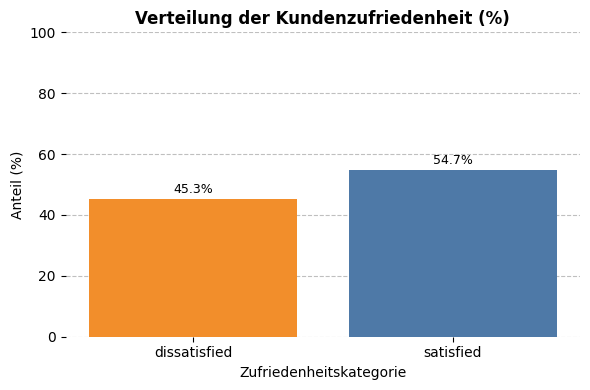

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Prozentuale Verteilung berechnen
counts = df_zufriedenheit['satisfaction'].value_counts(normalize=True).sort_index() * 100
labels = counts.index
values = counts.values

# IBCS-konformer Plot (in Prozent)
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=['#F28E2B', '#4E79A7'])

# Achsen & Beschriftung
ax.set_title('Verteilung der Kundenzufriedenheit (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Anteil (%)')
ax.set_xlabel('Zufriedenheitskategorie')
ax.set_ylim(0, 100)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

# Prozentwerte auf Balken
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=9)

# IBCS: Randlos und klar
plt.tight_layout()
plt.box(False)
plt.show()

<h2 style="color: black; text-align: left;"><b>4.2. Analysen und Erkenntnisse zum sekundären Datensatz</b></h2>

<b>Frage: Wie verteilt sich die Passagierzahl auf verschiedene Altersgruppen?</b>

<p style="font-size: 16px; line-height: 1.5;">
Zunächst werden die Daten für die Analyse geladen
</p>

In [ ]:
# Datensätze von Kaggle herunterladen
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path_zufriedenheit = "Invistico_Airline.csv"
file_path_airlines_delay = "airlines_delay.csv"
file_path_crowded_airports = "Airports.csv"

# Kundenzufriedenheit
df_zufriedenheit = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sjleshrac/airlines-customer-satisfaction",
  file_path_zufriedenheit,
)

# Verspätungen
df_airlines_delay = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ulrikthygepedersen/airlines-delay",
  file_path_airlines_delay,
)

# Flughäfen
df_crowded_airports = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "khaiid/most-crowded-airports",
    file_path_crowded_airports,
)

df_distance_ap = pd.read_csv("/content/sample_data/Distance_of_All_Airports.csv")

<ipython-input-4-04a7f7b214ef>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_zufriedenheit = kagglehub.load_dataset(
<ipython-input-4-04a7f7b214ef>:17: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_airlines_delay = kagglehub.load_dataset(
<ipython-input-4-04a7f7b214ef>:24: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_crowded_airports = kagglehub.load_dataset(


<h3 style="color: black; text-align: left;"><b>Sekundäre Datensätze</b></h3>
Nun soll der sekundäre Datensatz der Verspätungen, um die Spalten der Anzahl an Personenaufkommen im Abflugs-Flughafen und Ziel-Flughafen, sowie der Distanz der entsprechenden Strecke ergänzt werden.

In [ ]:
# Unterteilung einer Spalte auf zwei neue Spalten
df_crowded_airports[['IATA', 'ICAO']] = df_crowded_airports['Code'].str.split('/', n=1, expand=True)
#df_crowded_airports

# df_airlines_delay und df_crowded_airports verbinden
# Merge "Passenger" für "AirportFrom"
merged_df_from = pd.merge(df_airlines_delay, df_crowded_airports[['IATA', 'Passengers']], left_on='AirportFrom', right_on='IATA', how='left')
df_airlines_delay['AirportFromCrowd'] = merged_df_from['Passengers']

# Merge "Passenger" für "AirportTo"
merged_df_to = pd.merge(df_airlines_delay, df_crowded_airports[['IATA', 'Passengers']], left_on='AirportTo', right_on='IATA', how='left')
df_airlines_delay['AirportToCrowd'] = merged_df_to['Passengers']
#df_airlines_delay

#df_distance_ap und df_airlines_delay verbinden
df_zwischenstand = df_airlines_delay.merge(df_distance_ap, left_on=['AirportFrom', 'AirportTo'],
                      right_on=['ORIGIN', 'DEST'], how='left')

#nur die gewünschten spalten übernehmen
df_merge_erledigt = df_zwischenstand[['Flight','Time','Length','Airline','AirportFrom','AirportTo','DayOfWeek','Class','AirportFromCrowd','AirportToCrowd','DISTANCE IN MILES']]
df_merge_erledigt

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,AirportFromCrowd,AirportToCrowd,DISTANCE IN MILES
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0,42918685.0,NaN,696.0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0,110531300.0,30860251.0,911.0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0,107394029.0,84372618.0,728.0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0,103902992.0,83339186.0,2845.0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0,104171935.0,79828183.0,533.0
...,...,...,...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1,103902992.0,NaN,224.0
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1,104171935.0,NaN,628.0
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1,NaN,16484132.0,192.0
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1,NaN,33741129.0,281.0


An dieser Stelle sind alle Datensätze zusammengefügt und werden nun bereinigt.

In [ ]:
# Fehlende Werte analysieren
print(df_merge_erledigt.isnull().sum())

# Bereinigt
df_merge_erledigt = df_merge_erledigt.dropna()
print(df_merge_erledigt.isnull().sum())

Flight                    0
Time                      0
Length                    0
Airline                   0
AirportFrom               0
AirportTo                 0
DayOfWeek                 0
Class                     0
AirportFromCrowd     110730
AirportToCrowd       109825
DISTANCE IN MILES      7792
dtype: int64
Flight               0
Time                 0
Length               0
Airline              0
AirportFrom          0
AirportTo            0
DayOfWeek            0
Class                0
AirportFromCrowd     0
AirportToCrowd       0
DISTANCE IN MILES    0
dtype: int64


Nun kann mit der Analyse und Visualisierungen fortgefahren werden.
Zunächst wird eine Verspätungsrate berechnet indem der Mittelwert der Spalte "Classe" für jede Gruppe von AirportFrom ermittelt wird. Anschliessend werden die Top 10 Flughäfen dargestellt und entsprechend angeordnet.

<ipython-input-7-125c6b628c7a>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=top10_airports.index, y=top10_airports.values, palette="coolwarm", ci=None)
<ipython-input-7-125c6b628c7a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top10_airports.index, y=top10_airports.values, palette="coolwarm", ci=None)


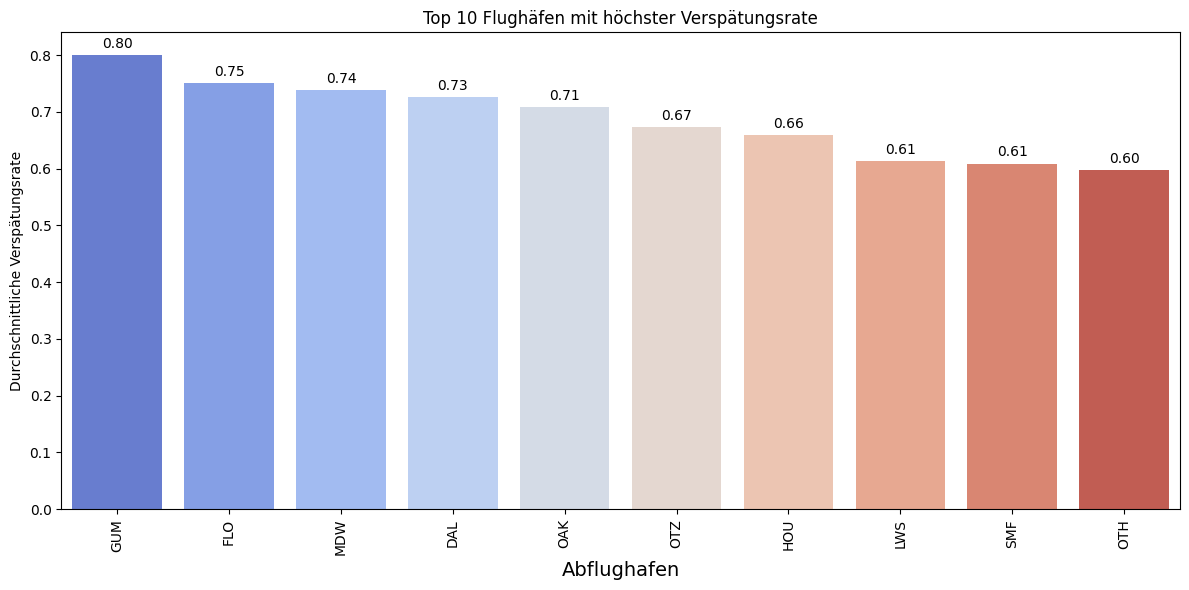

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Berechne die durchschnittliche Verspätungsrate pro Abflughafen
airport_delay = df_merge_erledigt.groupby("AirportFrom")["Class"].mean()

# Sortiere die Flughäfen nach der Verspätungsrate in absteigender Reihenfolge und wähle die Top 10
top10_airports = airport_delay.sort_values(ascending=False).head(10)

# Visualisiere die Top 10 Flughäfen mit der höchsten Verspätungsrate
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top10_airports.index, y=top10_airports.values, palette="coolwarm", ci=None)
plt.xticks(rotation=90)
plt.title("Top 10 Flughäfen mit höchster Verspätungsrate")
plt.xlabel("Abflughafen", fontsize=14)
plt.ylabel("Durchschnittliche Verspätungsrate")
plt.tight_layout()

# Füge über jedem Balken den entsprechenden Wert hinzu
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 3), textcoords='offset points')

plt.show()

Die Auswertung weisst darauf hin, dass folgende Flughären eine erhöhte Verpätungsrate aufweisen:

<ol>
    <li>GUM	Internationaler Flughafen „Antonio B. Won Pat“, Hagåtña, Guam, Vereinigte Staaten</li>
    <li>FLO	Florence Regional Airport, Florence, South Carolina, Vereinigte Staaten</li>
    <li>MDW	Chicago (Midway Airport), Chicago, Illinois, USA</li>
    <li>DAL	Flughafen Dallas Love Field, Dallas, Texas, Vereinigte Staaten</li>
    <li>OAK	Oakland International Airport, Oakland, Kalifornien, USA</li>
    <li>OTZ	Kotzebue-Ralph Wien, Kotzebue, Alaska, USA</li>
    <li>HOU	Flughafen „William P. Hobby“, Houston, Texas, Vereinigte Staaten</li>
    <li>LWS	Lewiston-Nez Perce County Airport, Lewiston, Idaho, USA</li>
    <li>SMF	Flughafen Sacramento, Sacramento, Kalifornien, USA</li>
    <li>OTH	North Bend Municipal Airport, North Bend, Oregon, USA</li>
</ol>

Nun werden die Tage näher betrachtet:


<ipython-input-9-974973cfe491>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_erledigt["DayName"] = df_merge_erledigt["DayOfWeek"].map(day_mapping)
<ipython-input-9-974973cfe491>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="DayName", y="Class", data=df_merge_erledigt, ci=None, palette="coolwarm", order=day_order)
<ipython-input-9-974973cfe491>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="DayName", y="Class", data=df_merge_erledigt, ci=None, palette="coolwarm", order=day_order)


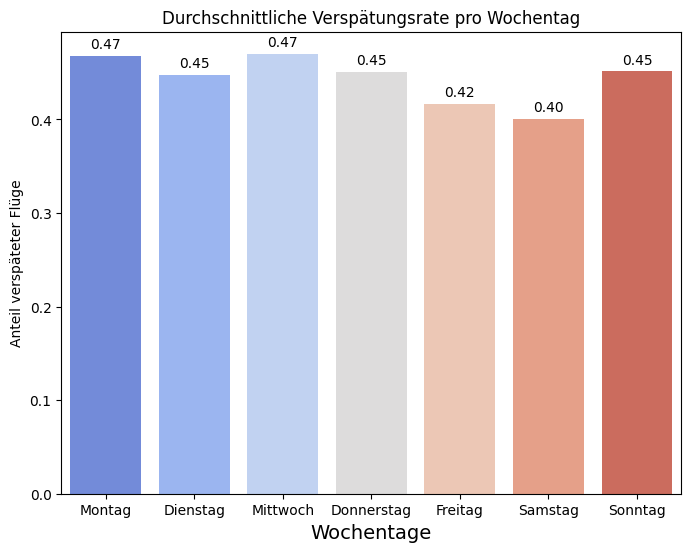

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping von Zahlen zu Wochentagen
day_mapping = {1: "Montag", 2: "Dienstag", 3: "Mittwoch", 4: "Donnerstag", 5: "Freitag", 6: "Samstag", 7: "Sonntag"}

# Neue Spalte "DayName" erstellen
df_merge_erledigt["DayName"] = df_merge_erledigt["DayOfWeek"].map(day_mapping)

# Definiere die Reihenfolge der Wochentage
day_order = ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"]

# Barplot erstellen
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="DayName", y="Class", data=df_merge_erledigt, ci=None, palette="coolwarm", order=day_order)

# Füge an jedem Balken den entsprechenden Wert (Höhe) hinzu
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 3), textcoords='offset points')

plt.title("Durchschnittliche Verspätungsrate pro Wochentag")
plt.xlabel("Wochentage", fontsize=14)
plt.ylabel("Anteil verspäteter Flüge")
plt.show()

Die Verspätungsraten variieren im Verlauf der Woche, wobei Anfang und Mitte der Woche (insbesondere Montag und Mittwoch) die höchsten Werte aufweisen, während das Wochenende, vor allem der Samstag, relativ geringere Verspätungsanteile zeigt.

Nun sollen die Wochentage näher betrachtet werden.

<ipython-input-11-4e987f2c07f4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_merge_erledigt["Class"], y=df_merge_erledigt["Time"], palette="coolwarm")


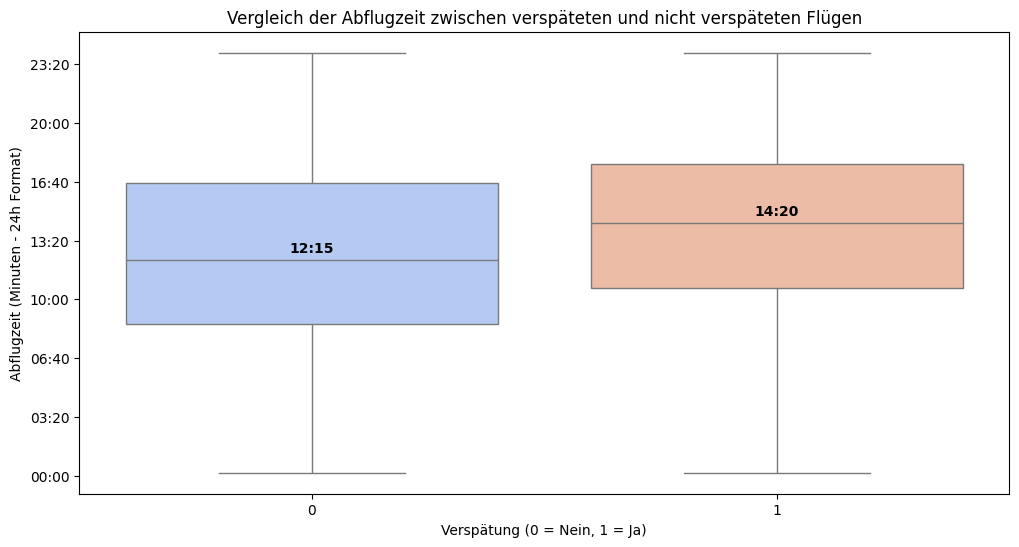

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Funktion, die Minuten in ein HH:MM-Format umwandelt
def minutes_to_time(x):
    hours = int(x // 60)
    minutes = int(x % 60)
    return f'{hours:02d}:{minutes:02d}'

plt.figure(figsize=(12, 6))
# Hinweis: Wenn du nur x und y (ohne hue) angibst, kannst du palette beibehalten –
# falls es zu einer Warnung kommt, ignoriere sie oder setze legend=False.
ax = sns.boxplot(x=df_merge_erledigt["Class"], y=df_merge_erledigt["Time"], palette="coolwarm")

plt.title("Vergleich der Abflugzeit zwischen verspäteten und nicht verspäteten Flügen")
plt.xlabel("Verspätung (0 = Nein, 1 = Ja)")
plt.ylabel("Abflugzeit (Minuten - 24h Format)")

# y-Achsen-Tick-Labels in HH:MM umwandeln
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: minutes_to_time(x)))

# Berechne und annotiere den Median für jede Kategorie (0 und 1)
classes = sorted(df_merge_erledigt["Class"].unique())
for i, cls in enumerate(classes):
    median_val = df_merge_erledigt[df_merge_erledigt["Class"] == cls]["Time"].median()
    ax.annotate(f'{minutes_to_time(median_val)}',
                xy=(i, median_val),          # Position des Medians
                xytext=(0, 3),               # Verschiebung (0 horizontal, 3 Punkte nach oben)
                textcoords='offset points',  # Relativer Offset
                ha='center', va='bottom',
                color='black', weight='bold', fontsize=10)

plt.show()

Betrachtet man die Mediane und deren Verschiebung beim Vergleich, legt diese nahe, dass Flüge, die später am Tag starten, häufiger verspätet sind. Ein möglicher Einflussgrund könnte sein, dass sich Verspätungen manchmal im Tagesverlauf akkumulieren oder dass betriebliche Herausforderungen bei späten Abflügen stärker ins Gewicht fallen.
Flüge, die später starten, haben möglicherweise die Nachwirkungen von zuvor aufgetretenen Verspätungen, die sich im Tagesverlauf verstärken. Es können aber auch vermehrt logistische oder technische Probleme im Verlaufe des Tages auftreten.

Nun sollten die Flugdistanzen zwischen den verspäteten und nicht verspäteten Flügen verglichen werden.

<ipython-input-12-162566cb3d8b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_merge_erledigt["Class"], y=df_merge_erledigt["DISTANCE IN MILES"], palette="coolwarm")


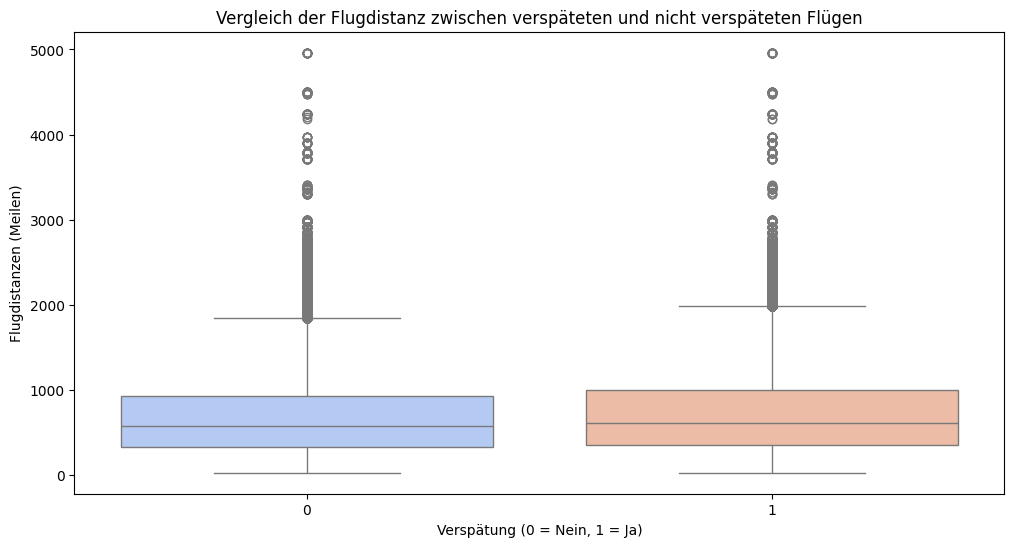

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_merge_erledigt["Class"], y=df_merge_erledigt["DISTANCE IN MILES"], palette="coolwarm")
plt.title("Vergleich der Flugdistanz zwischen verspäteten und nicht verspäteten Flügen")
plt.xlabel("Verspätung (0 = Nein, 1 = Ja)")
plt.ylabel("Flugdistanzen (Meilen)")
plt.show()

Erkenntnis

In [ ]:
# Kombinieren von Start- und Zielflughäfen zu einer neuen Spalte "Route"
df_merge_erledigt['Route'] = df_merge_erledigt['AirportFrom'] + ' → ' + df_merge_erledigt['AirportTo']
#df_merge_erledigt


<ipython-input-18-de0740505261>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_erledigt['Route'] = df_merge_erledigt['AirportFrom'] + ' → ' + df_merge_erledigt['AirportTo']


,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,AirportFromCrowd,AirportToCrowd,DISTANCE IN MILES,DayName,Route
1,6948.0,360.0,146.0,OO,COS,ORD,4,0,110531300.0,30860251.0,911.0,Donnerstag,COS → ORD
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0,107394029.0,84372618.0,728.0,Mittwoch,BOS → CLT
3,31.0,1410.0,344.0,US,OGG,PHX,6,0,103902992.0,83339186.0,2845.0,Samstag,OGG → PHX
4,563.0,692.0,98.0,FL,BMI,ATL,4,0,104171935.0,79828183.0,533.0,Donnerstag,BMI → ATL
10,1147.0,1103.0,121.0,FL,CRW,MCO,4,0,15892892.0,44422022.0,686.0,Donnerstag,CRW → MCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539368,2296.0,1035.0,168.0,DL,MSP,LGA,1,1,42918685.0,107394029.0,1020.0,Montag,MSP → LGA
539369,852.0,865.0,337.0,AS,HNL,SEA,6,1,110531300.0,103902992.0,2677.0,Samstag,HNL → SEA
539370,2130.0,840.0,66.0,US,LGA,BOS,1,1,107394029.0,104171935.0,184.0,Montag,LGA → BOS
539375,769.0,480.0,287.0,CO,LAS,EWR,2,1,110531300.0,16484132.0,2227.0,Dienstag,LAS → EWR


<ipython-input-19-0119f84852cd>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=top50_routes.index, y=top50_routes.values, ci=None, palette=colors)
<ipython-input-19-0119f84852cd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top50_routes.index, y=top50_routes.values, ci=None, palette=colors)


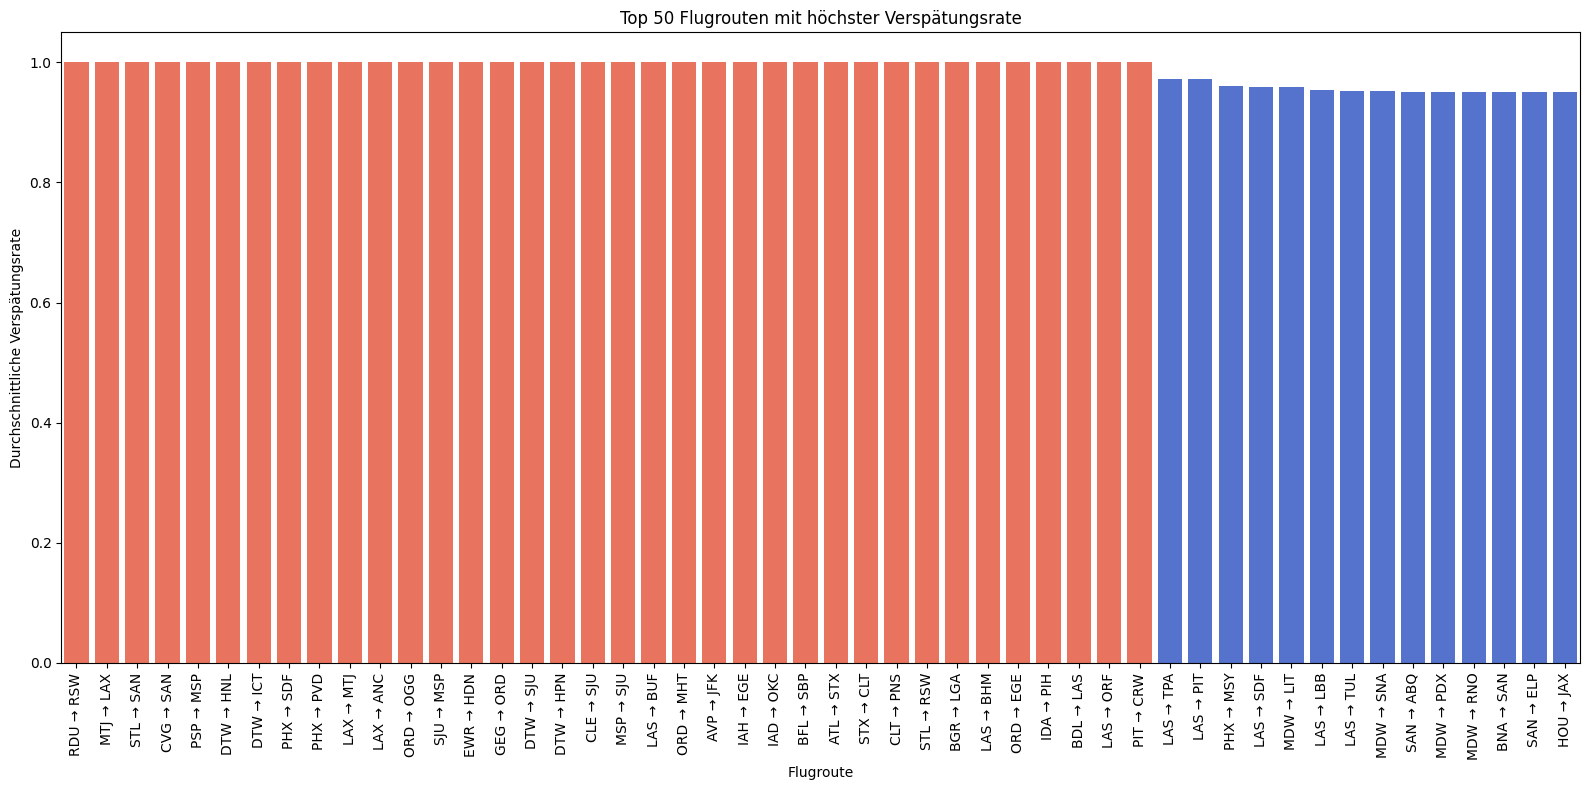

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Berechne die durchschnittliche Verspätungsrate pro Flugroute
route_delay = df_merge_erledigt.groupby("Route")["Class"].mean()

# Sortiere die Routen absteigend und wähle die Top 50 aus
top50_routes = route_delay.sort_values(ascending=False).head(50)

# Erstelle eine Liste von Farben: Rot für Routen mit Rate == 1, ansonsten Blau
colors = ['tomato' if val == 1.0 else 'royalblue' for val in top50_routes.values]

# Visualisiere die Top 50 Flugrouten mit der entsprechenden Farbgebung
plt.figure(figsize=(16, 8))  # Größere Figure, um die vielen x-Achsen-Beschriftungen unterzubringen
sns.barplot(x=top50_routes.index, y=top50_routes.values, ci=None, palette=colors)
plt.xticks(rotation=90)
plt.title("Top 50 Flugrouten mit höchster Verspätungsrate")
plt.xlabel("Flugroute")
plt.ylabel("Durchschnittliche Verspätungsrate")
plt.tight_layout()  # Optimiert das Layout, damit nichts abgeschnitten wird
plt.show()